Imports

In [248]:
import pandas as pd                                     # data handling
import numpy as np                                      # data manipulation
import matplotlib.pyplot as plt                         # plots and visualization
from sklearn.preprocessing import normalize             # data normalization
from scipy.cluster.hierarchy import dendrogram, linkage # dendrogram
from sklearn.cluster import AgglomerativeClustering # hierarchical clustering
from sklearn.cluster import KMeans # Kmeans clustering
from sklearn.cluster import DBSCAN # DBSCAN clustering
from sklearn.neighbors import NearestNeighbors # DBSCAN finding eps and minpoints

Load the dataset. Multiple product categories (e.g., Fresh, Milk,...) and the number of purchased units by each client.

In [249]:
data = pd.read_csv(r'C:\Users\daria\PycharmProjects\Master_Karnten\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicacies
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Normalize the data. The scale of each variable must be the same to avoid bias towards the variables with a higher magnitude (like Fresh).

In [250]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicacies
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


TODO:
Segment the clients of the wholesale distributor based on their annual spending on diverse product categories.

1. Use a dendrogram to select a reasonable number of clusters.

2. Cluster the data using hierarchical clustering.

3. Cluster the data using k-Means clustering.

3. Plot the clusters and INTERPRET the results!

## 1. Use a dendrogram to select a reasonable number of clusters.

### Single Linkage

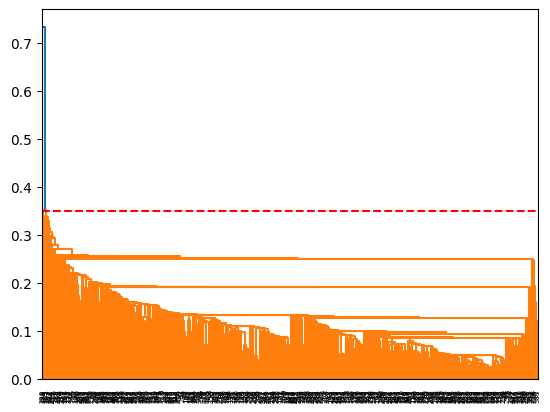

In [251]:
temp = linkage(data_scaled, 'single')
plt.figure()
dn1 = dendrogram(temp)
plt.axline((0,0.35),(1,0.35),color='red',linestyle='dashed')

### Average linkage

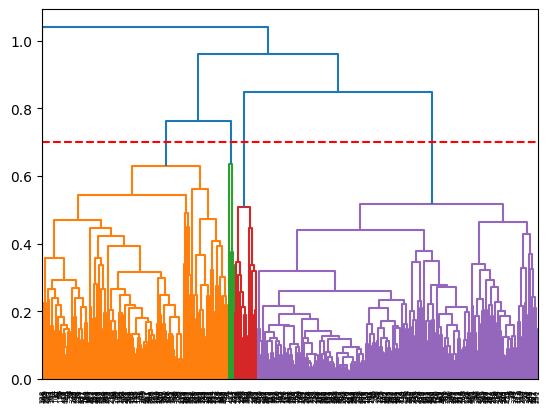

In [252]:
temp = linkage(data_scaled, 'average')
plt.figure()
dn2 = dendrogram(temp)
plt.axline((0,0.7),(1,0.7),color='red',linestyle='dashed')

### Complete linkage

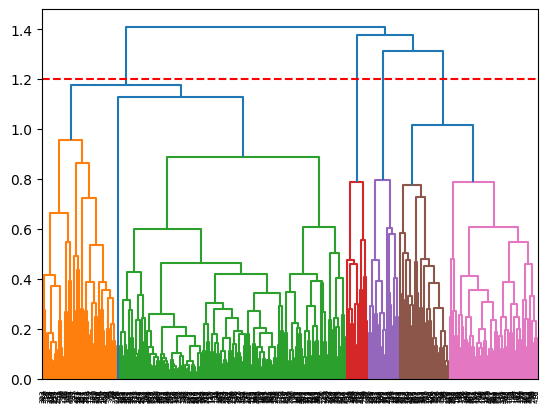

In [253]:
temp = linkage(data_scaled, 'complete')
plt.figure()
dn3 = dendrogram(temp)
plt.axline((0,1.2),(1,1.2),color='red',linestyle='dashed')

### Ward's linkage

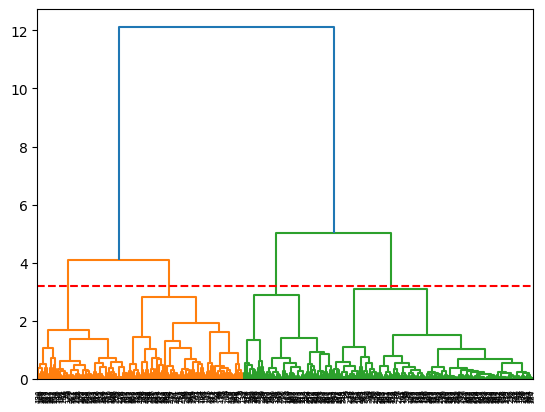

In [254]:
temp = linkage(data_scaled, 'ward')
plt.figure()
dn4 = dendrogram(temp)
plt.axline((0,3.2),(1,3.2),color='red',linestyle='dashed')

### Interpretation
- Since our data is normalized and quantitative, ward's linkage performs the best dendrogram from those presented above
- From these plots, we can see that the average cut will result in having 4 or less clusters.

## 2. Cluster the data using hierarchical clustering.

In [255]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierarchical_result = hierarchical_cluster.fit_predict(data)

### Interpretation

- I used an Agglomerative Clustering, n_clusters=4 based on the optimal number resulted from dendrograms, used as a linkage the ward's linked since it is the best fit here and as the comparison of distances the euclidean distance
- Then I fit the data using this clustering algorithm

## Cluster the data using k-Means clustering.
### Elbow method to determine best number of clusters

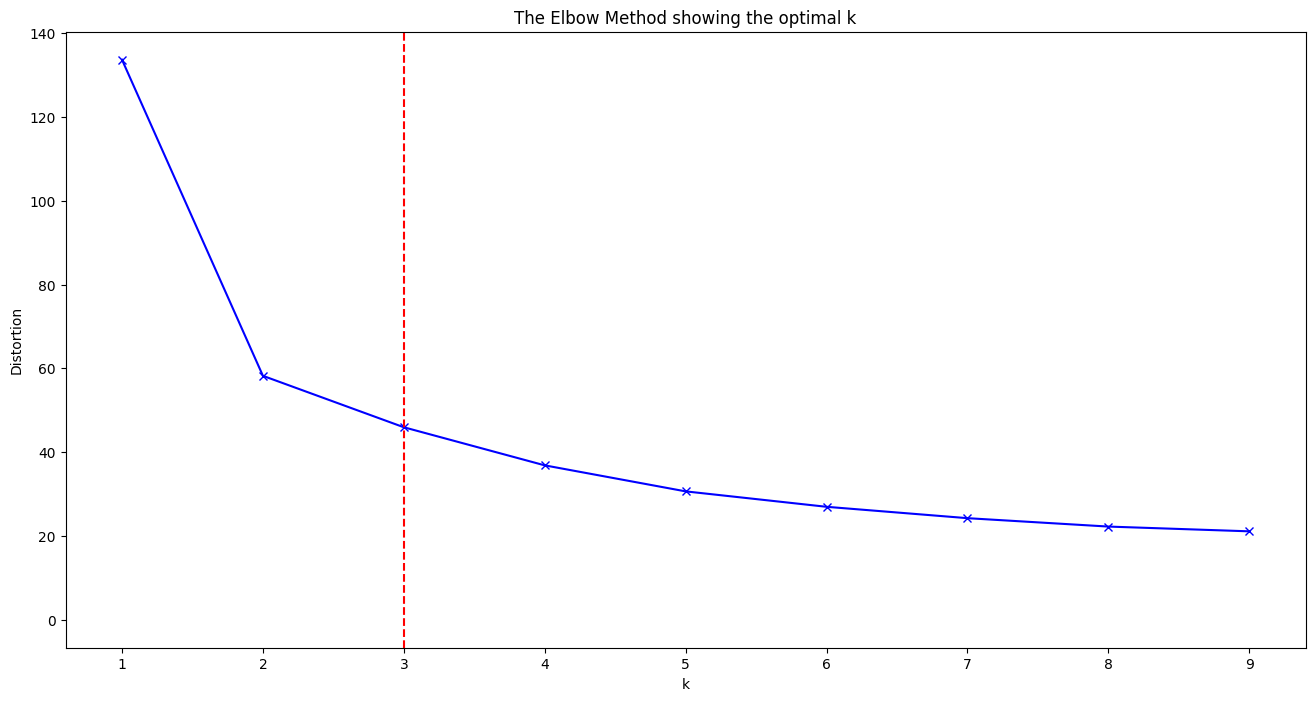

In [256]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axline((3,0),(3,130),color='red',linestyle='dashed')
plt.show()

### KMeans Clustering

In [257]:
kmeans = KMeans(
    n_clusters=3,  # set the number of clusters
    init='random',  # initial position of cluster centers
    n_init=1,  # number of k-Means runs with different initial centers
    max_iter=10,  # maximum number of iterations within a single run
    tol=1e-04,  # tolerance (metrics) for convergence
    random_state=2 # reproduction parameters
                )
kmeans_result = kmeans.fit_predict(data_scaled)

### Interpretation

- I used KMeans algorith with 3 clusters based on the elbow method resulted above, then I fit the data using this algorithm.

## DBSCAN clustering on the data

#### Check shape of data

In [258]:
data_scaled.shape

(440, 8)

#### Thus, min points will be = 2 * 8 = 16

In [259]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself
# P.S.: Yes, I believe in the religion of n_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=5).fit(data_scaled)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data_scaled)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

#### Now, we use k-NN distance plot (knee plot) in order to find best eps value


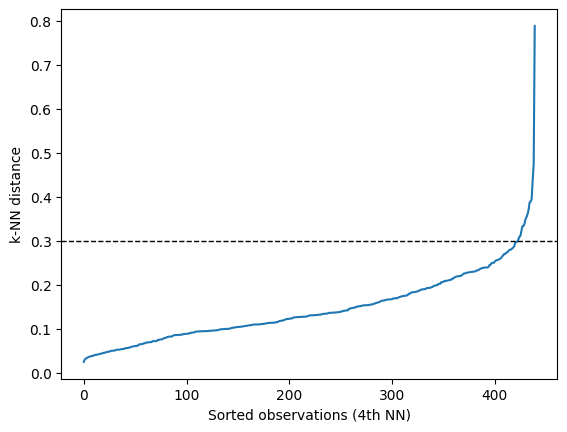

In [260]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=0.3, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

#### Min points will be = 2 * 8 = 16
#### And eps will be = 0.3
#### Now we create the DBSCAN clustering and fit the algorithm to our data

In [261]:
clusters = DBSCAN(eps=2.5, min_samples=4)

dbscan_result = clusters.fit(data_scaled)

## Plot the clusters and INTERPRET the results!

### Plots of Hierarchical clustering

In [274]:
# we will take some values: Region, Fresh
new_data = data_scaled.iloc[:, [0,1,2,3,4,5,6,7]].values

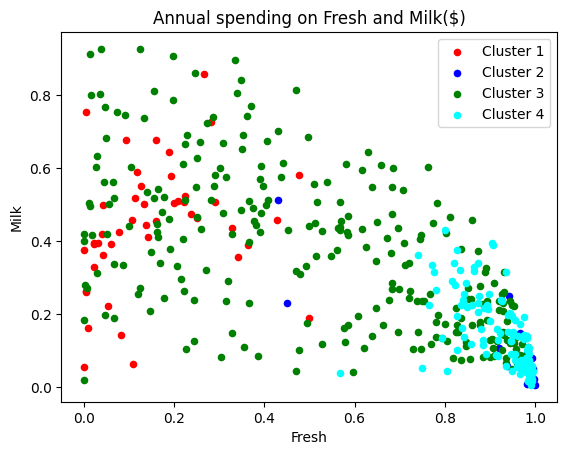

In [275]:
plt.scatter(new_data[hierarchical_result == 0, 2], new_data[hierarchical_result == 0, 3], s = 20, c = 'red', label = 'Cluster 1') # plotting cluster 1
plt.scatter(new_data[hierarchical_result == 1, 2], new_data[hierarchical_result == 1, 3], s = 20, c = 'blue', label = 'Cluster 2') # plotting cluster 2
plt.scatter(new_data[hierarchical_result == 2, 2], new_data[hierarchical_result == 2, 3], s = 20, c = 'green', label = 'Cluster 3') # plotting cluster 3
plt.scatter(new_data[hierarchical_result == 3, 2], new_data[hierarchical_result == 3, 3], s = 20, c = 'cyan', label = 'Cluster 4')  # plotting cluster 4
# plot title addition
plt.title('Annual spending on Fresh and Milk($)')
# labelling the x-axis
plt.xlabel('Fresh')
# label of the y-axis
plt.ylabel('Milk')
# printing the legend
plt.legend()
# show the plot
plt.show()

### Plots of KMeans clustering

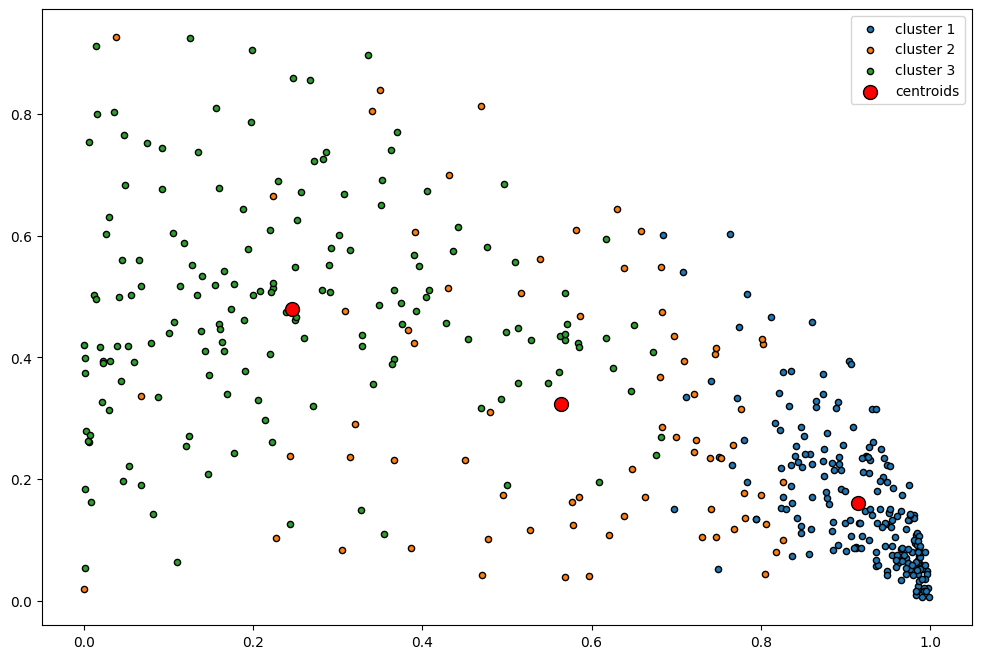

In [271]:
# plot the samples
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
for c in range(0, 3):
    plt.scatter(
        new_data[kmeans_result == c, 2], new_data[kmeans_result == c, 3],
        s=20,
        edgecolor='black',
        label='cluster ' + str(c+1)
    )

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
    s=100, marker='o',
    color='red',
    edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)